## Task 1

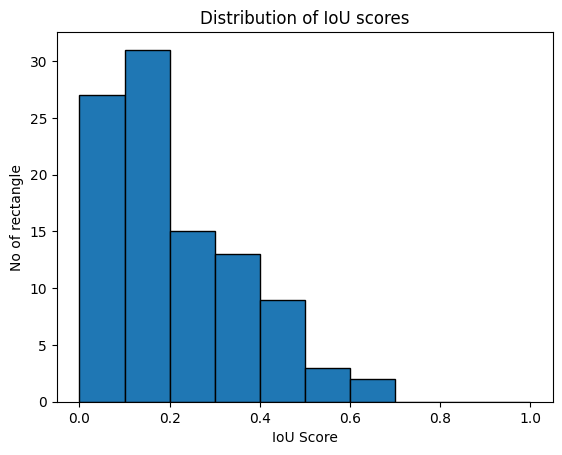

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def calculate_iou(rect1, rect2):
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    # cordinate calculation
    xi1 = max(x1, x2)
    yi1 = max(y1, y2)
    xi2 = min(x1 + w1, x2 + w2)
    yi2 = min(y1 + h1, y2 + h2)
    
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - inter_area
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

filename = '/home/harsh/WS2023/DataScience_Survival_Skills/HW6/rectanglesdsss.sec'
iou_scores = []

with h5py.File(filename, 'r') as file:
    ground_truth_group = file['/ground_truth']
    predicted_group = file['/predicted']

    for key in ground_truth_group.keys():
        # Access the attributes for ground truth and predicted rectangles
        gt_attrs = ground_truth_group[key].attrs
        pr_attrs = predicted_group[key].attrs
        gt_rect = (gt_attrs['i0'], gt_attrs['i1'], gt_attrs['i2'], gt_attrs['i3'])
        pred_rect = (pr_attrs['i0'], pr_attrs['i1'], pr_attrs['i2'], pr_attrs['i3'])

        iou = calculate_iou(gt_rect, pred_rect)
        iou_scores.append(iou)

# Plot the histogram
plt.hist(iou_scores, bins=np.linspace(0, 1, 11), edgecolor='black')
plt.xlabel('IoU Score')
plt.ylabel('No of rectangle')
plt.title('Distribution of IoU scores')
plt.show()


## Task 2

### Perfect

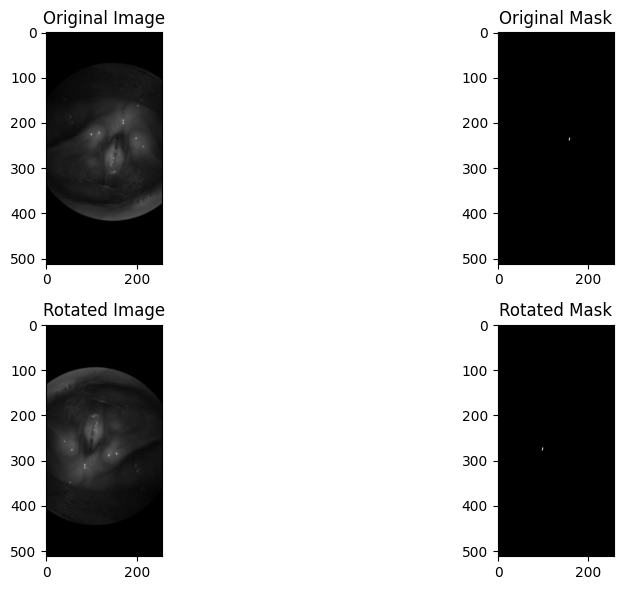

In [6]:
import numpy as np
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import os

# Set the directory where the images are located
dataset_directory = '/home/harsh/WS2023/DataScience_Survival_Skills/HW6/extracted_dataset/Mini_BAGLS_dataset'

# Generate a list of numerical file indices from 0 to 99
numerical_indices = list(range(100))

# Set your matriculation number as the seed
matriculation_number = 23162173  
np.random.seed(matriculation_number)

# Randomly select an index from the numerical_indices list
index = np.random.choice(numerical_indices)
selected_image_file = f"{index}.png"
selected_mask_file = f"{index}_seg.png"

# Construct the full paths for image and mask files
image_path = os.path.join(dataset_directory, selected_image_file)
mask_path = os.path.join(dataset_directory, selected_mask_file)

image = None
mask = None

try:
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
except Exception as e:
    print(f"Error loading image or mask: {str(e)}")

if image is None or mask is None:
    print("Image or mask data is None")
else:
    # Ensure that image and mask are numpy arrays with valid data types
    image = np.array(image, dtype=np.uint8)
    mask = np.array(mask, dtype=np.uint8)

    # Check and resize the dimensions if needed
    if image.shape[0] != mask.shape[0] or image.shape[1] != mask.shape[1]:
        print("Image and mask dimensions do not match")
    else:
        # Define the data augmentation pipeline with albumentations
        transform = A.Compose([
            A.RandomRotate90(),
        ])

        # Apply the rotation transformation to the image and mask
        try:
            augmented = transform(image=image, mask=mask)
            rotated_image = augmented['image']
            rotated_mask = augmented['mask']
        except Exception as e:
            print(f"Error applying transformations: {str(e)}")

           # Visualization of the original image, original mask, rotated image, and rotated mask
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    # plt.axis('off')  # Comment this out to show the scale
    
    # Original Mask
    plt.subplot(2, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Original Mask')
    # plt.axis('off')  # Comment this out to show the scale
    
    # Rotated Image
    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Rotated Image')
    # plt.axis('off')  # Comment this out to show the scale
    
    # Rotated Mask
    plt.subplot(2, 2, 4)
    plt.imshow(rotated_mask, cmap='gray')
    plt.title('Rotated Mask')
    # plt.axis('off')  # Comment this out to show the scale
    
    plt.tight_layout()
    plt.show()



### MAin : 

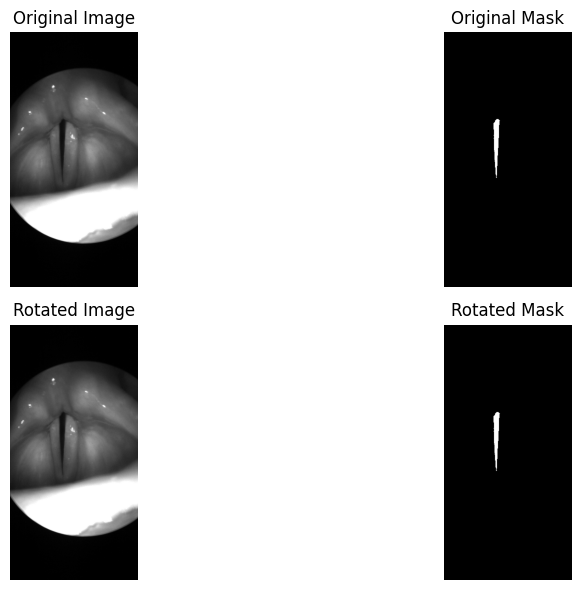

In [2]:
import numpy as np
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import os

# Set the directory where the images are located
dataset_directory = '/home/harsh/WS2023/DataScience_Survival_Skills/HW6/extracted_dataset/Mini_BAGLS_dataset'

# Generate a list of numerical file indices from 0 to 99
numerical_indices = list(range(100))

# Your matriculation number as the seed to ensure reproducibility
matriculation_number = 123456  # Replace with your actual matriculation number
np.random.seed(matriculation_number)

# Randomly select an index from the numerical_indices list
index = np.random.choice(numerical_indices)
selected_image_file = f"{index}.png"
selected_mask_file = f"{index}_seg.png"

# Construct the full paths for image and mask files
image_path = os.path.join(dataset_directory, selected_image_file)
mask_path = os.path.join(dataset_directory, selected_mask_file)

image = None
mask = None

try:
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
except Exception as e:
    print(f"Error loading image or mask: {str(e)}")

if image is None or mask is None:
    print("Image or mask data is None")
else:
    # Ensure that image and mask are numpy arrays with valid data types
    image = np.array(image, dtype=np.uint8)
    mask = np.array(mask, dtype=np.uint8)

    # Check and resize the dimensions if needed
    if image.shape[0] != mask.shape[0] or image.shape[1] != mask.shape[1]:
        print("Image and mask dimensions do not match")
    else:
        # Define the data augmentation pipeline with albumentations
        transform = A.Compose([
            A.RandomRotate90(),
        ])

        # Apply the rotation transformation to the image and mask
        try:
            augmented = transform(image=image, mask=mask)
            rotated_image = augmented['image']
            rotated_mask = augmented['mask']
        except Exception as e:
            print(f"Error applying transformations: {str(e)}")

        # Visualization of the original image, original mask, rotated image, and rotated mask
        plt.figure(figsize=(12, 6))

        # Original Image
        plt.subplot(2, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # Original Mask
        plt.subplot(2, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title('Original Mask')
        plt.axis('off')

        # Rotated Image
        plt.subplot(2, 2, 3)
        plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
        plt.title('Rotated Image')
        plt.axis('off')

        # Rotated Mask
        plt.subplot(2, 2, 4)
        plt.imshow(rotated_mask, cmap='gray')
        plt.title('Rotated Mask')
        plt.axis('off')

        plt.tight_layout()
        plt.show()


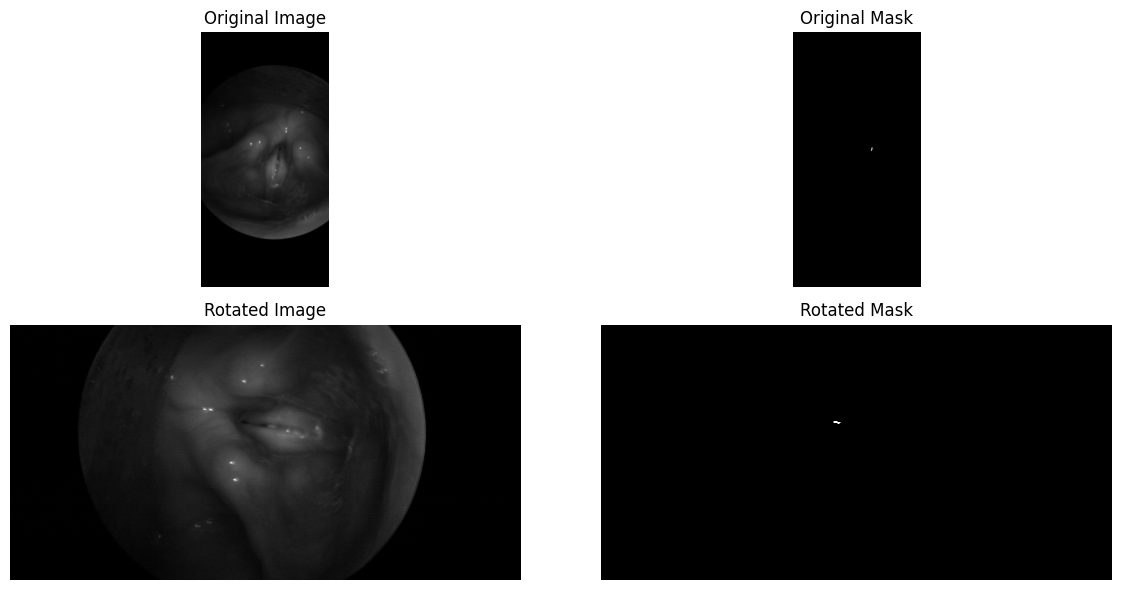

In [3]:
import numpy as np
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import os

# Set the directory where the images are located
dataset_directory = '/home/harsh/WS2023/DataScience_Survival_Skills/HW6/extracted_dataset/Mini_BAGLS_dataset'

# Generate a list of numerical file indices from 0 to 99
numerical_indices = list(range(100))

# Set your matriculation number as the seed
matriculation_number = 23162173  
np.random.seed(matriculation_number)

# Randomly select an index from the numerical_indices list
index = np.random.choice(numerical_indices)
selected_image_file = f"{index}.png"
selected_mask_file = f"{index}_seg.png"

# Construct the full paths for image and mask files
image_path = os.path.join(dataset_directory, selected_image_file)
mask_path = os.path.join(dataset_directory, selected_mask_file)

image = None
mask = None

try:
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
except Exception as e:
    print(f"Error loading image or mask: {str(e)}")

if image is None or mask is None:
    print("Image or mask data is None")
else:
    # Ensure that image and mask are numpy arrays with valid data types
    image = np.array(image, dtype=np.uint8)
    mask = np.array(mask, dtype=np.uint8)

    # Check and resize the dimensions if needed
    if image.shape[0] != mask.shape[0] or image.shape[1] != mask.shape[1]:
        print("Image and mask dimensions do not match")
    else:
        # Define the data augmentation pipeline with albumentations
        transform = A.Compose([
            A.RandomRotate90(),
        ])

        # Apply the rotation transformation to the image and mask
        try:
            augmented = transform(image=image, mask=mask)
            rotated_image = augmented['image']
            rotated_mask = augmented['mask']
        except Exception as e:
            print(f"Error applying transformations: {str(e)}")

        # Visualization of the original image, original mask, rotated image, and rotated mask
        plt.figure(figsize=(12, 6))

        # Original Image
        plt.subplot(2, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # Original Mask
        plt.subplot(2, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title('Original Mask')
        plt.axis('off')

        # Rotated Image
        plt.subplot(2, 2, 3)
        plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
        plt.title('Rotated Image')
        plt.axis('off')

        # Rotated Mask
        plt.subplot(2, 2, 4)
        plt.imshow(rotated_mask, cmap='gray')
        plt.title('Rotated Mask')
        plt.axis('off')

        plt.tight_layout()
        plt.show()


### OTheres


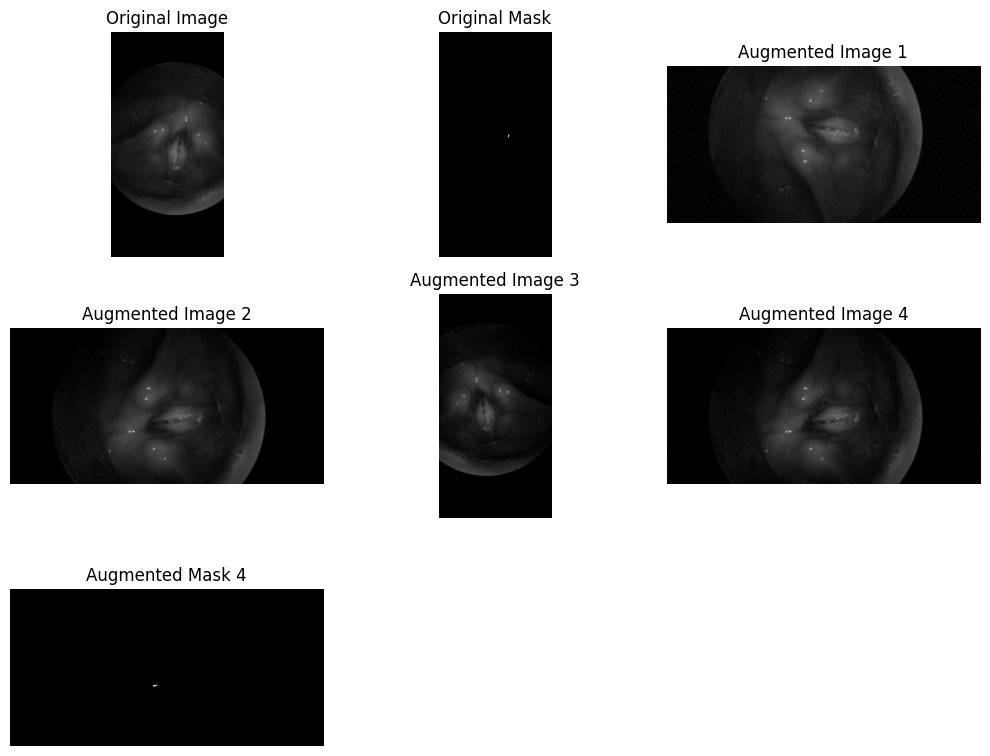

In [36]:
import numpy as np
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import os

# Set the directory where the images are located
dataset_directory = '/home/harsh/WS2023/DataScience_Survival_Skills/HW6/extracted_dataset/Mini_BAGLS_dataset'

# Generate a list of numerical file indices from 0 to 99
numerical_indices = list(range(100))

# Set your matriculation number as the seed
matriculation_number = 23162173  
np.random.seed(matriculation_number)

# Randomly select an index from the numerical_indices list
index = np.random.choice(numerical_indices)
selected_image_file = f"{index}.png"
selected_mask_file = f"{index}_seg.png"

# Construct the full paths for image and mask files
image_path = os.path.join(dataset_directory, selected_image_file)
mask_path = os.path.join(dataset_directory, selected_mask_file)

image = None
mask = None

try:
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
except Exception as e:
    print(f"Error loading image or mask: {str(e)}")

if image is None or mask is None:
    print("Image or mask data is None")
else:
    # Ensure that image and mask are numpy arrays with valid data types
    image = np.array(image, dtype=np.uint8)
    mask = np.array(mask, dtype=np.uint8)

    # Check and resize the dimensions if needed
    if image.shape[0] != mask.shape[0] or image.shape[1] != mask.shape[1]:
        print("Image and mask dimensions do not match")
    else:
        # Define the data augmentation pipeline with albumentations
        transform = A.Compose([
            A.RandomRotate90(),
            A.Flip(),
            A.Transpose(),
            A.OneOf([
                A.GaussNoise(),
            ], p=0.2),
            A.OneOf([
                A.MotionBlur(p=0.2),
                A.MedianBlur(blur_limit=3, p=0.1),
                A.Blur(blur_limit=3, p=0.1),
            ], p=0.2),
            A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
            A.OneOf([
                A.OpticalDistortion(p=0.3),
                A.GridDistortion(p=0.1),
                A.PiecewiseAffine(p=0.3),  # Use Albumentations' PiecewiseAffine
            ], p=0.2),
            A.HueSaturationValue(p=0.3),
        ])

        # Apply the transformations to the image and mask
        augmented_images = []
        augmented_masks = []

        for i in range(4):
            try:
                augmented = transform(image=image, mask=mask)
                augmented_images.append(augmented['image'])
                augmented_masks.append(augmented['mask'])
            except Exception as e:
                print(f"Error applying transformations: {str(e)}")

        # Visualization of the original and augmented images and masks
        plt.figure(figsize=(10, 8))

        plt.subplot(3, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(3, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title('Original Mask')
        plt.axis('off')

        for i in range(4):
            plt.subplot(3, 3, 3 + i)
            plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))
            plt.title(f'Augmented Image {i+1}')
            plt.axis('off')

            plt.subplot(3, 3, 4 + i)
            plt.imshow(augmented_masks[i], cmap='gray')
            plt.title(f'Augmented Mask {i+1}')
            plt.axis('off')

        plt.tight_layout()
        plt.show()


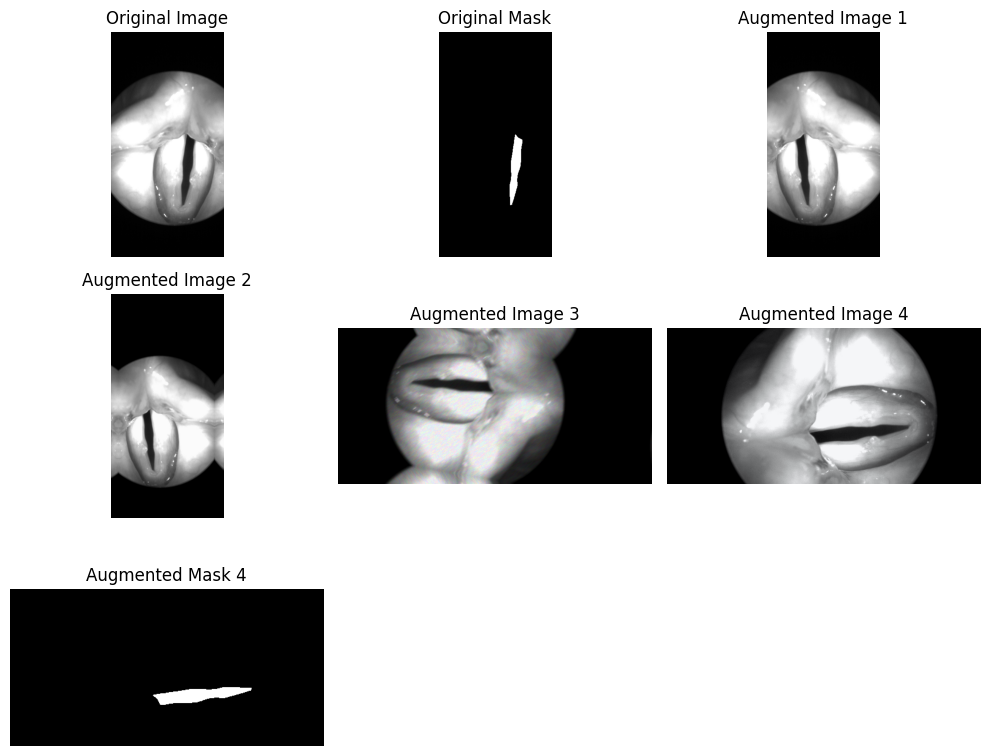

In [32]:
import numpy as np
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import os

# Set the directory where the images are located
dataset_directory = '/home/harsh/WS2023/DataScience_Survival_Skills/HW6/extracted_dataset/Mini_BAGLS_dataset'

# Generate a list of numerical file indices from 0 to 99
numerical_indices = list(range(100))

# Randomly select an index from the numerical_indices list
index = np.random.choice(numerical_indices)
selected_image_file = f"{index}.png"
selected_mask_file = f"{index}_seg.png"

# Construct the full paths for image and mask files
image_path = os.path.join(dataset_directory, selected_image_file)
mask_path = os.path.join(dataset_directory, selected_mask_file)

image = None
mask = None

try:
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
except Exception as e:
    print(f"Error loading image or mask: {str(e)}")

if image is None or mask is None:
    print("Image or mask data is None")
else:
    # Ensure that image and mask are numpy arrays with valid data types
    image = np.array(image, dtype=np.uint8)
    mask = np.array(mask, dtype=np.uint8)

    # Check and resize the dimensions if needed
    if image.shape[0] != mask.shape[0] or image.shape[1] != mask.shape[1]:
        print("Image and mask dimensions do not match")
    else:
        # Define the data augmentation pipeline with albumentations
        transform = A.Compose([
            A.RandomRotate90(),
            A.Flip(),
            A.Transpose(),
            A.OneOf([
                A.GaussNoise(),
            ], p=0.2),
            A.OneOf([
                A.MotionBlur(p=0.2),
                A.MedianBlur(blur_limit=3, p=0.1),
                A.Blur(blur_limit=3, p=0.1),
            ], p=0.2),
            A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
            A.OneOf([
                A.OpticalDistortion(p=0.3),
                A.GridDistortion(p=0.1),
                A.PiecewiseAffine(p=0.3),  # Use Albumentations' PiecewiseAffine
            ], p=0.2),
            A.HueSaturationValue(p=0.3),
        ])

        # Apply the transformations to the image and mask
        augmented_images = []
        augmented_masks = []

        for i in range(4):
            try:
                augmented = transform(image=image, mask=mask)
                augmented_images.append(augmented['image'])
                augmented_masks.append(augmented['mask'])
            except Exception as e:
                print(f"Error applying transformations: {str(e)}")

        # Visualization of the original and augmented images and masks
        plt.figure(figsize=(10, 8))

        plt.subplot(3, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(3, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title('Original Mask')
        plt.axis('off')

        for i in range(4):
            plt.subplot(3, 3, 3 + i)
            plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))
            plt.title(f'Augmented Image {i+1}')
            plt.axis('off')

            plt.subplot(3, 3, 4 + i)
            plt.imshow(augmented_masks[i], cmap='gray')
            plt.title(f'Augmented Mask {i+1}')
            plt.axis('off')

        plt.tight_layout()
        plt.show()
